# Health Analysis

In [46]:
%run analysis_functions.ipynb

In [47]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [38]:
# Generate to save, but don't display
chart = chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

### ![](charting.png)

In [33]:
chart = chart_cervical_mucus(
    df,
    with_text=True,
    outfile="charting_with_text",
)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Current symptoms
- Pelvic pain, unable to have sex or stand long
- Abdominal pain
- Nausea, acid reflux, frequent and loose BMs
- Abdominal bloating
- Fatigue
- Headaches, tinnitus
- Painful and swollen finger joints
- Reactive hypoglycemia

## Symptoms, quantified

In [48]:
numeric_metrics = [
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "pelvic pain",
    "stomach pain",
    "fatigue",
    "headache",
    "uncomfortable stomach",
    "bloated stomach_bool",
    "diarrhea_bool",
    "nausea",
    "white clouds in urine",
]

In [49]:
# last N days, excluding most recent, incomplete day
last_n_days = 30
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()
min_pain = 4

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
    min_pain=min_pain,
)
print(summary)

06/07/24 - 07/06/24

100% of days had pelvic pain at least 5 / 10.
90% of days had stomach pain at least 5 / 10.
87% of days had fatigue.
77% of days had headache.
23% of days had bloated stomach.
20% of days had uncomfortable stomach.
17% of days had nausea.
7% of days had white clouds in urine.
7% of days had diarrhea.

3.0 BMs / day
86 / 100 sleep score



<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

In [50]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 30

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)

with open("output/medication_summary.txt", "w") as f:
    f.write(summary)

print(summary)

06/07/24 - 07/06/24

CURRENTLY TAKING
7 mg CBD, 6/7/24
25 mg DHEA, 1/12/24
80 mg Magnesium Lysinate Glycinate Chelate, 7/3/24
1000 mg Metformin, 3/15/24
47 mg Mirabegron, 3/20/24
1900 mg Myo-Inositol, 5/10/24
31 mg Omeprazole, 7/4/24
14 mg THC, 6/7/24
1000 mcg Vitamin B12, 9/23/23
250 mg Vitamin B6, 1/5/24
4000 IU Vitamin D3, 9/23/23
967 mg fish oil, 5/28/24
Pepto Bismol: 23% of days
Zofran: 7% of days

PREVIOUS
500 mg Acetaminophen, 7/5/24 - 7/5/24
567 mg Curcumin Phytosome, 5/15/24 - 6/26/24
2133 mg Cystomend, 7/4/24 - 7/5/24
14 mg Famotidine, 5/23/24 - 6/26/24
47 mg Pycnogenol, 1/2/24 - 7/5/24
477 mg Rifaximin, 6/23/24 - 7/1/24



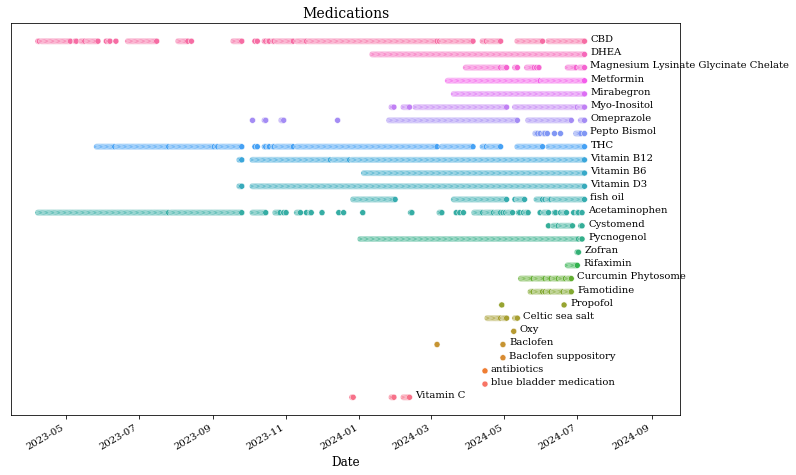

In [52]:
plot_meds_over_time(df)

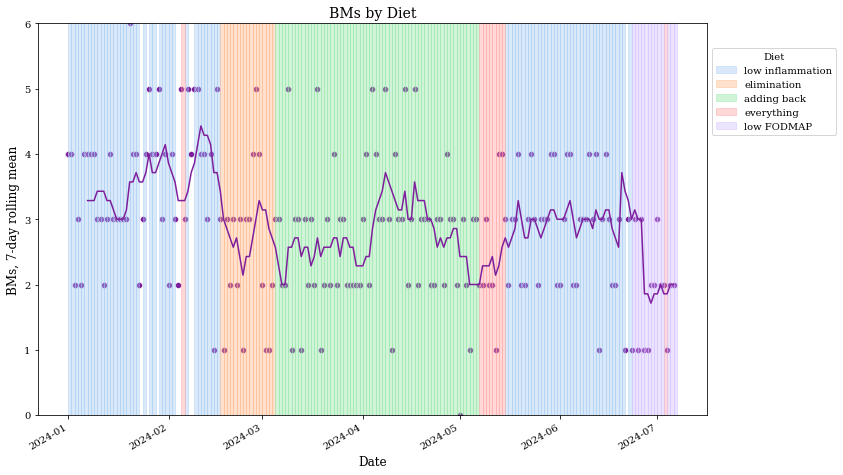

In [53]:
diets = ["low inflammation", "elimination", "adding back", "everything", "low FODMAP"]
df, metric_data, diet_data, metrics_dict = get_diet_data(df, diets)
start_dt = pd.datetime(2024, 1, 1)
end_dt = df.index[-2]
rolling_days = 7

metrics = [
    "BMs",
]
for metric in metrics:
    plot_diet_metric(
        metric,
        df,
        diet_data,
        start_dt,
        end_dt,
        rolling_days=rolling_days,
        include_scatter=True,
    )